## OPM and dOPM simulations

First, setup the simulation i.e. the elements


In [1]:
# Elements
import sys
if '..//' not in sys.path:
    sys.path.append('..//')

from opmsim.optical_system_base import OpticalSystem
from opmsim import optical_elements
from opmsim import dipole_source
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline 
#notebook

np.set_printoptions(threshold=sys.maxsize)

savepath = "Z:/User data/Leo Rowe-Brown/OPMsim_output/thesis_figs/"



Full sphere generation
cap method area sum 12.56134205549413
expected area sum 6.283185307179586


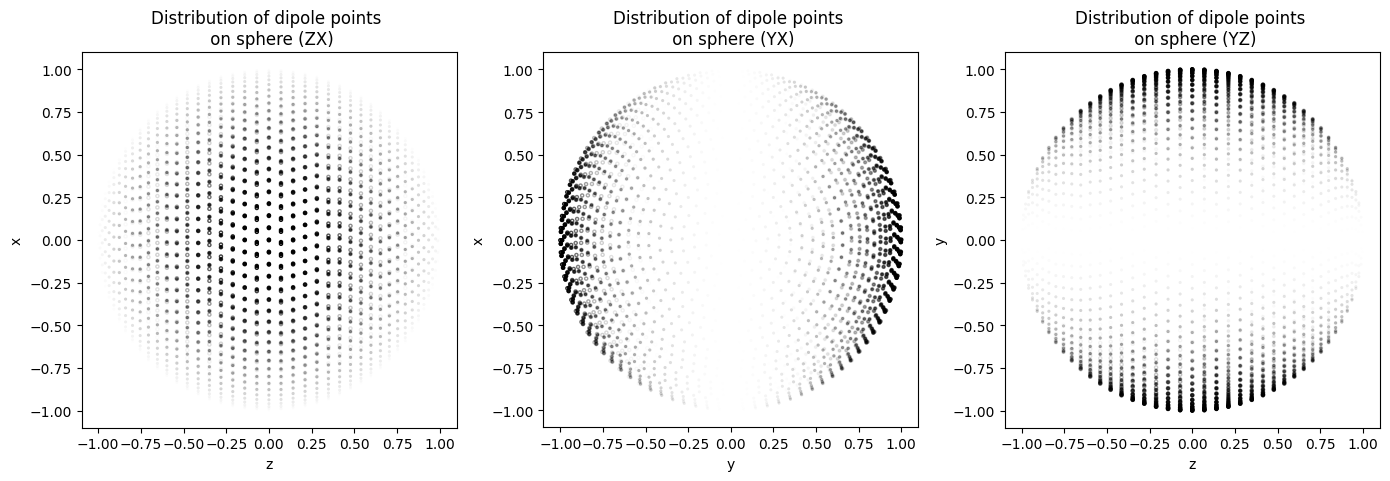

In [12]:
source = dipole_source.DipoleSource()
source.generate_dipoles(2500)
source.classical_photoselection((0,0*np.pi/180))

In [ ]:
## OPM
O1 = optical_elements.SineLens(NA=1.2, focal_length=0.180/60, n=1.33)
TL1 = optical_elements.SineLens(NA=0.1, focal_length=0.180, n=1)
TL2 = optical_elements.SineLens(NA=0.1, focal_length=0.162, n=1)
O2 = optical_elements.SineLens(NA=0.95, focal_length=0.180/50, n=1)
O3_35 = optical_elements.SineLens(NA=0.6, focal_length=0.200/40, n=1, yAxis_rotation=35*np.pi/180)
O3_45 = optical_elements.SineLens(NA=0.6, focal_length=0.200/40, n=1, yAxis_rotation=45*np.pi/180)
TL3 = optical_elements.SineLens(NA=0.1, focal_length=0.1013, n=1)

source = dipole_source.DipoleSource()
source.generate_dipoles(2500)
source.classical_photoselection((np.pi/2,0))

savepath_full = os.path.join(savepath, "OPM")
os.makedirs(savepath_full)


options = {
    'ray_count': 10000,
    'draw_rays': False,
    'max_rays_stored': 10000,
}

plot_options = {
    'title': 'Pupil intensity at final image plane of dOPM microscope',
    'add_sim_details': True,
    'max_r_in': 0,
    'scale_range': None# [0,0.3]
}
elements = [O1, TL1, TL2, O2, O3_35, TL3]

## 35 degrees
# steady state

source = dipole_source.DipoleSource()
source.generate_dipoles(2500)
source.classical_photoselection((np.pi/2,0))

system = OpticalSystem("OPM system (35 degrees) steady state", elements, source, options)
system.trace()
pupil_fig = system.detector.plot_pupil()
plt.savefig(os.path.join(savepath_full, "pupil_plot_steady_state_35.png")
            
# out-of-plane polarisation
source = dipole_source.DipoleSource()
source.generate_dipoles(2500)
source.classical_photoselection((np.cos(,0))
    
# rapid tumbling         
            
source = dipole_source.DipoleSource()
source.generate_dipoles(2500)
source.classical_photoselection((0,35*np.pi/180))
            
system = OpticalSystem("OPM system (35 degrees) rapidly tumbling", elements, source, options)
system.trace()
pupil_fig = system.detector.plot_pupil()
plt.savefig(os.path.join(savepath_full, "pupil_plot_rapid_tumbling_35.png")
            


In [ ]:
## 45 degrees
# steady state
            
elements = [O1, TL1, TL2, O2, O3_45, TL3]

system = OpticalSystem("OPM system (35 degrees)", elements, source, options)
system.trace()
pupil_fig = system.detector.plot_pupil()
plt.savefig(os.path.join(savepath_full, "pupil_plot_steady_state_45.png")

# rapid tumbling         
            
system = OpticalSystem("OPM system (35 degrees)", elements, source, options)
system.trace()
pupil_fig = system.detector.plot_pupil()
plt.savefig(os.path.join(savepath_full, "pupil_plot_rapid_tumbling_45.png")

In [ ]:
QWP = optical_elements.WavePlate(np.pi/4, np.pi/2)

LP = optical_elements.LinearPolariser(0)
LP2 = optical_elements.LinearPolariser(np.pi/2)

AgSiO2_mirror = optical_elements.FlatMirror(opm_angle/2, 158e-9, perfect_mirror=False, reflectance=1,\
                                            fresnel_debug_savedir="C:/Users/lnr19/code/OPMsim/output")


mirror = optical_elements.FlatMirror(opm_angle/2, 158e-9, perfect_mirror=True, reflectance=1,\
                                            fresnel_debug_savedir="C:/Users/lnr19/code/OPMsim/output")